################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################

/home/jack/anaconda3/envs/TASLPReview/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/jack/anaconda3/envs/TASLPReview/lib/python3.10/site-packages/

=====================Cross validation start==================


100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


The best score with scoring parameter: 'r2' is 0.8
The best parameters are : {'model__C': 5.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_lowMinimal_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Syncrony_cols+Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols, label ASDTD ,UAR 0.8321428571428571
=====================Cross validation start==================


100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


The best score with scoring parameter: 'r2' is 0.675
The best parameters are : {'model__C': 1.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols, label ASDTD ,UAR 0.6785714285714286
=====================Cross validation start==================


100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


The best score with scoring parameter: 'r2' is 0.825
The best parameters are : {'model__C': 1.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_K_cols+Phonation_Syncrony_cols, label ASDTD ,UAR 0.8428571428571429
=====================Cross validation start==================


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


The best score with scoring parameter: 'r2' is 0.7083333333333333
The best parameters are : {'model__C': 5.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_moderate_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Trend_K_cols+Phonation_Proximity_cols, label ASDTD ,UAR 0.7115384615384616
=====================Cross validation start==================


100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


The best score with scoring parameter: 'r2' is 0.8083333333333333
The best parameters are : {'model__C': 1.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_moderate_CSS >> Phonation_Proximity_cols, label ASDTD ,UAR 0.8102564102564103
=====================Cross validation start==================


100%|██████████| 5/5 [00:02<00:00,  2.06it/s]


The best score with scoring parameter: 'r2' is 0.7875
The best parameters are : {'model__C': 1.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_high_CSS >> DEP_columns+Phonation_Proximity_cols, label ASDTD ,UAR 0.7689393939393939
=====================Cross validation start==================


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


The best score with scoring parameter: 'r2' is 0.8375
The best parameters are : {'model__C': 1.0, 'model__kernel': 'rbf', 'model__probability': True, 'model__random_state': 1}
Feature TD vs df_feature_high_CSS >> Phonation_Proximity_cols, label ASDTD ,UAR 0.843939393939394
df_allThreeClassifiers_paperName generated at  RESULTS//TASLPTABLE-Class_Norm[func15].xlsx
proposed_expstr='TD vs df_feature_lowMinimal_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Syncrony_cols+Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
proposed_expstr='TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
proposed_expstr='TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_K_cols+Phonation_Syncrony_cols::ASDTD'
baseline_expstr='TD vs df_feature_moderate_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
baseline_expstr='TD vs df_feature_moderate_CSS >> Phonation_Proximity_cols::AS

FileNotFoundError: [Errno 2] No such file or directory: 'images/SHAP_discussion_10.png'

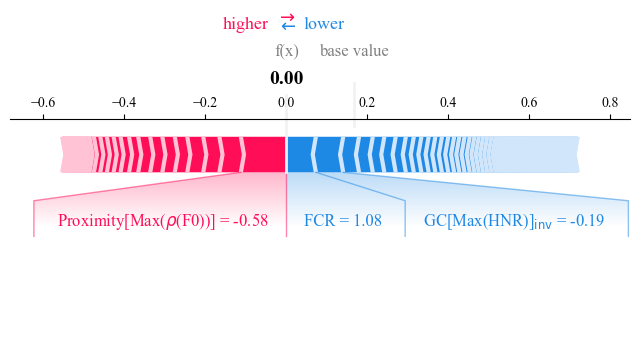

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 30 15:56:45 2021

@author: jackchen


    This is a branch of MainClassification that run specific experiments
    
    Include SHAP values in this script

"""

import os, sys
import pandas as pd
import numpy as np

import glob
import pickle

from scipy.stats import spearmanr,pearsonr 
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier

from addict import Dict
# import functions
import argparse
from scipy.stats import zscore

from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet
import sklearn.svm
import torch
import re
import matplotlib.pyplot as plt
from sklearn import preprocessing

from articulation.HYPERPARAM import phonewoprosody, Label
from articulation.HYPERPARAM.PeopleSelect import SellectP_define
import articulation.HYPERPARAM.FeatureSelect as FeatSel

import articulation.articulation
from sklearn.metrics import f1_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from itertools import combinations
import shap
import articulation.HYPERPARAM.PaperNameMapping as PprNmeMp
import inspect
import seaborn as sns

from articulation.HYPERPARAM.PlotFigureVars import *

def Find_Experiment_actualindex(Total_FeatComb_idxs,search_string):
    # usage:
    # e.x. :
    # search_string='Phonation_Trend_K_cols+Phonation_Syncrony_cols+Phonation_Trend_D_cols'
    # Total_FeatComb_idxs=FeatSel.Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation['static_feautre_LOC+dynamic_feature_LOC+dynamic_feature_phonation'].keys()
    # Find_Experiment_actualindex(Total_FeatComb_idxs,search_string)
    for FC_str in Total_FeatComb_idxs:
        if ''.join(sorted(FC_str.split("+"))) == ''.join(sorted(search_string.split("+"))):
            print(FC_str)



def Assert_labelfeature(feat_name,lab_name):
    # =============================================================================
    #     To check if the label match with feature
    # =============================================================================
    for i,n in enumerate(feat_name):
        assert feat_name[i] == lab_name[i]

def FilterFile_withinManualName(files,Manual_choosen_feature):
    files_manualChoosen=[f  for f in files if os.path.basename(f).split(".")[0]  in Manual_choosen_feature]
    return files_manualChoosen

def Merge_dfs(df_1, df_2):
    return pd.merge(df_1,df_2,left_index=True, right_index=True)

def Add_label(df_formant_statistic,Label,label_choose='ADOS_cate_C'):
    for people in df_formant_statistic.index:
        bool_ind=Label.label_raw['name']==people
        df_formant_statistic.loc[people,label_choose]=Label.label_raw.loc[bool_ind,label_choose].values
    return df_formant_statistic
def Swap2PaperName(feature_rawname,PprNmeMp,method='origin'):
    if method=='origin':
        PaperNameMapping=PprNmeMp.Paper_name_map
    elif method=='inverse':
        PaperNameMapping=PprNmeMp.Inverse_Paper_name_map
    elif method=='idx':
        PaperNameMapping=PprNmeMp.Feature2idx_map
    
    if feature_rawname in PaperNameMapping.keys():
        featurename_paper=PaperNameMapping[feature_rawname]
        feature_keys=featurename_paper
    else: 
        feature_keys=feature_rawname
    return feature_keys

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def Return_ALigned_dfXtestndfShapValues(Feature_SHAP_info_dict,logit_number=1):
    #Inputs
    # logit_numberit_number=1
    # Feature_SHAP_info_dict=Proposed_changed_info_dict
    ###################################
    df_XTest_stacked=pd.DataFrame()
    df_ShapValues_stacked=pd.DataFrame()
    for people in Feature_SHAP_info_dict.keys():
        df_XTest=Feature_SHAP_info_dict[people]['XTest']
        df_ShapValues=Feature_SHAP_info_dict[people]['shap_values'].loc[logit_number]
        df_ShapValues.name=df_XTest.name
        df_XTest_stacked=pd.concat([df_XTest_stacked,df_XTest],axis=1)
        df_ShapValues_stacked=pd.concat([df_ShapValues_stacked,df_ShapValues],axis=1)
    return df_XTest_stacked,df_ShapValues_stacked

def Calculate_XTestShape_correlation(Feature_SHAP_info_dict,logit_number=1):
    df_XTest_stacked,df_ShapValues_stacked=Return_ALigned_dfXtestndfShapValues(Feature_SHAP_info_dict,logit_number=logit_number)
    Correlation_XtestnShap={}
    for features in df_XTest_stacked.index:
        r,p=pearsonr(df_XTest_stacked.loc[features],df_ShapValues_stacked.loc[features])
        Correlation_XtestnShap[features]=r
    df_Correlation_XtestnShap=pd.DataFrame.from_dict(Correlation_XtestnShap,orient='index')
    df_Correlation_XtestnShap.columns=['correlation w logit:{}'.format(logit_number)]
    return df_Correlation_XtestnShap

def Prepare_data_for_summaryPlot(SHAPval_info_dict, feature_columns=None, PprNmeMp=None):
    keys_bag=[]
    XTest_dict={}
    shap_values_0_bag=[]
    shap_values_1_bag=[]
    for people in sorted(SHAPval_info_dict.keys()):
        keys_bag.append(people)
        if not feature_columns == None:
            df_=SHAPval_info_dict[people]['XTest'][feature_columns]
            df_shape_value=SHAPval_info_dict[people]['shap_values'][feature_columns]
        else:
            df_=SHAPval_info_dict[people]['XTest']
            df_shape_value=SHAPval_info_dict[people]['shap_values']
        # if not SumCategorical_feats == None:
        #     for k,values in SumCategorical_feats.items():
        #         df_[k]=df_.loc[values].sum()
        XTest_dict[people]=df_        
        shap_values_0_bag.append(df_shape_value.loc[0].values)
        shap_values_1_bag.append(df_shape_value.loc[1].values)
    shap_values_0_array=np.vstack(shap_values_0_bag)
    shap_values_1_array=np.vstack(shap_values_1_bag)
    shap_values=[shap_values_0_array,shap_values_1_array]
    # df_XTest=pd.DataFrame.from_dict(XTest_dict,orient='index')
    df_XTest=pd.DataFrame.from_dict(XTest_dict).T
    if PprNmeMp!=None:
        df_XTest.columns=[Swap2PaperName(k,PprNmeMp) for k in df_XTest.columns]
    return shap_values, df_XTest, keys_bag

def get_args():
    # we add compulsary arguments as named arguments for readability
    parser = argparse.ArgumentParser()
    parser.add_argument('--Feature_mode', default='Customized_feature',
                        help='what kind of data you want to get')
    parser.add_argument('--preprocess', default=True,
                        help='')
    parser.add_argument('--start_point', default=-1,
                        help='In case that the program stop at certain point, we can resume the progress by setting this variable')
    parser.add_argument('--experiment', default='gop_exp_ADOShappyDAAIKidallDeceiptformosaCSRC',
                        help='If the mode is set to Session_phone_phf, you may need to determine the experiment used to generate the gop feature')
    parser.add_argument('--pseudo', default=False,
                        help='what kind of data you want to get')
    parser.add_argument('--suffix', default="",
                        help='what kind of data you want to get')
    parser.add_argument('--FS_method_str', default=None,
                        help='Feature selection')
    parser.add_argument('--Print_Analysis_grp_Manual_select', default=True,
                        help='')
    parser.add_argument('--Plot', default=True,
                        help='')
    parser.add_argument('--Reverse_exp', default=False, dest="Reverse_exp",
                        help='')
    parser.add_argument('--selectModelScoring', default='recall_macro',
                        help='[recall_macro,accuracy]')
    parser.add_argument('--Mergefeatures', default=True,
                        help='')
    parser.add_argument('--logit_number', default=0,
                        help='現在都改用decision function了，所以指會有一個loigit')
    parser.add_argument('--decision_boundary', default=0,
                        help='現在都改用decision function了，decision_boundary = 0')
    parser.add_argument('--knn_weights', default='uniform',
                            help='path of the base directory')
    parser.add_argument('--knn_neighbors', default=2,  type=int,
                            help='path of the base directory')
    parser.add_argument('--Reorder_type', default='DKIndividual',
                            help='[DKIndividual, DKcriteria]')
    parser.add_argument('--Normalize_way', default='func15',
                            help='func1 func2 func3 func4 func7 proposed')
    parser.add_argument('--FeatureComb_mode', default='Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation',
                            help='[Add_UttLvl_feature, feat_comb3, feat_comb5, feat_comb6,feat_comb7, baselineFeats,Comb_dynPhonation,Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation]')
    args = parser.parse_args(args=[])
    return args
args = get_args()
start_point=args.start_point
experiment=args.experiment
knn_weights=args.knn_weights
knn_neighbors=args.knn_neighbors
Reorder_type=args.Reorder_type
logit_number=args.logit_number
Reverse_exp=args.Reverse_exp
decision_boundary=args.decision_boundary


Session_level_all=Dict()
# Discriminative analysis Main
columns=[
    'Divergence[within_covariance_norm(A:,i:,u:)]',
    'Divergence[within_variance_norm(A:,i:,u:)]',    
    'Divergence[between_covariance_norm(A:,i:,u:)]',    
    'Divergence[between_variance_norm(A:,i:,u:)]',    
    'Divergence[total_covariance_norm(A:,i:,u:)]', 
    'Divergence[total_variance_norm(A:,i:,u:)]',
    'Divergence[sam_wilks_lin_norm(A:,i:,u:)]',    
    'Divergence[pillai_lin_norm(A:,i:,u:)]',
    'Divergence[roys_root_lin_norm(A:,i:,u:)]',
    'Divergence[hotelling_lin_norm(A:,i:,u:)]',
    'Divergence[Between_Within_Det_ratio_norm(A:,i:,u:)]',
    'Divergence[Between_Within_Tr_ratio_norm(A:,i:,u:)]',
    'Divergence[within_covariance_norm(A:,i:,u:)]_var_p1',
    'Divergence[within_variance_norm(A:,i:,u:)]_var_p1',
    'Divergence[between_covariance_norm(A:,i:,u:)]_var_p1',
    'Divergence[between_variance_norm(A:,i:,u:)]_var_p1',
    'Divergence[total_covariance_norm(A:,i:,u:)]_var_p1', 
    'Divergence[total_variance_norm(A:,i:,u:)]_var_p1',
    'Divergence[sam_wilks_lin_norm(A:,i:,u:)]_var_p1',
    'Divergence[pillai_lin_norm(A:,i:,u:)]_var_p1',
    'Divergence[roys_root_lin_norm(A:,i:,u:)]_var_p1',
    'Divergence[hotelling_lin_norm(A:,i:,u:)]_var_p1',
    'Divergence[Between_Within_Det_ratio_norm(A:,i:,u:)]_var_p1',
    'Divergence[Between_Within_Tr_ratio_norm(A:,i:,u:)]_var_p1',
    'Divergence[within_covariance_norm(A:,i:,u:)]_var_p2',    
    'Divergence[within_variance_norm(A:,i:,u:)]_var_p2',    
    'Divergence[between_covariance_norm(A:,i:,u:)]_var_p2',    
    'Divergence[between_variance_norm(A:,i:,u:)]_var_p2',
    'Divergence[total_covariance_norm(A:,i:,u:)]_var_p2', 
    'Divergence[total_variance_norm(A:,i:,u:)]_var_p2',
    'Divergence[sam_wilks_lin_norm(A:,i:,u:)]_var_p2',
    'Divergence[pillai_lin_norm(A:,i:,u:)]_var_p2',
    'Divergence[roys_root_lin_norm(A:,i:,u:)]_var_p2',
    'Divergence[hotelling_lin_norm(A:,i:,u:)]_var_p2',
    'Divergence[Between_Within_Det_ratio_norm(A:,i:,u:)]_var_p2',
    'Divergence[Between_Within_Tr_ratio_norm(A:,i:,u:)]_var_p2',
    ]

# columns=[
#     'VSA2',
#     'FCR2',
#     'within_covariance_norm(A:,i:,u:)',
#     'between_covariance_norm(A:,i:,u:)',
#     'within_variance_norm(A:,i:,u:)',
#     'between_variance_norm(A:,i:,u:)',
#     'total_covariance_norm(A:,i:,u:)',
#     'total_variance_norm(A:,i:,u:)',
#     'sam_wilks_lin_norm(A:,i:,u:)',
#     'pillai_lin_norm(A:,i:,u:)',
#     'Between_Within_Det_ratio_norm(A:,i:,u:)',
#     'Between_Within_Tr_ratio_norm(A:,i:,u:)',
# ]
# columns=[
# 'Norm(WC)_sam_wilks_DKRaito', 
# 'Norm(WC)_pillai_DKRaito',
# 'Norm(WC)_hotelling_DKRaito', 'Norm(WC)_roys_root_DKRaito',
# 'Norm(WC)_Det_DKRaito', 'Norm(WC)_Tr_DKRaito',
# 'Norm(BC)_sam_wilks_DKRaito', 'Norm(BC)_pillai_DKRaito',
# 'Norm(BC)_hotelling_DKRaito', 'Norm(BC)_roys_root_DKRaito',
# 'Norm(BC)_Det_DKRaito', 'Norm(BC)_Tr_DKRaito',
# 'Norm(TotalVar)_sam_wilks_DKRaito', 'Norm(TotalVar)_pillai_DKRaito',
# 'Norm(TotalVar)_hotelling_DKRaito', 'Norm(TotalVar)_roys_root_DKRaito',
# 'Norm(TotalVar)_Det_DKRaito', 'Norm(TotalVar)_Tr_DKRaito',
# ]
# Discriminative analysis: Side exp
# columns=[
# 'VSA1',
# 'FCR',
# 'within_covariance(A:,i:,u:)',
# 'between_covariance(A:,i:,u:)',
# 'within_variance(A:,i:,u:)',
# 'between_variance(A:,i:,u:)',
# 'sam_wilks_lin(A:,i:,u:)',
# 'pillai_lin(A:,i:,u:)',
# ]


featuresOfInterest_manual=[ [col] for col in columns]
# featuresOfInterest_manual=[ [col] + ['u_num+i_num+a_num'] for col in columns]


# label_choose=['ADOS_C','Multi1','Multi2','Multi3','Multi4']
label_choose=['ADOS_C']
# label_choose=['ADOS_cate','ASDTD']


def MERGEFEATURES():
    # =============================================================================
    '''

        Feature merging function
        
        Ths slice of code provide user to manually make functions to combine df_XXX_infos

    '''
    # =============================================================================
    # dataset_role='ASD_DOCKID'
    for dataset_role in ['ASD_DOCKID','TD_DOCKID']:
        Merg_filepath={}
        Merg_filepath['static_feautre_LOC']='Features/artuculation_AUI/Vowels/Formants/{Normalize_way}/Formant_AUI_tVSAFCRFvals_KID_From{dataset_role}.pkl'.format(dataset_role=dataset_role,Normalize_way=args.Normalize_way)
        # Merg_filepath['static_feautre_phonation']='Features/artuculation_AUI/Vowels/Phonation/Phonation_meanvars_KID_From{dataset_role}.pkl'.format(dataset_role=dataset_role)
        Merg_filepath['dynamic_feature_LOC']='Features/artuculation_AUI/Interaction/Formants/{Normalize_way}/Syncrony_measure_of_variance_DKIndividual_{dataset_role}.pkl'.format(dataset_role=dataset_role,Normalize_way=args.Normalize_way)
        Merg_filepath['dynamic_feature_phonation']='Features/artuculation_AUI/Interaction/Phonation/Syncrony_measure_of_variance_phonation_{dataset_role}.pkl'.format(dataset_role=dataset_role)
        
        merge_out_path='Features/ClassificationMerged_dfs/{Normalize_way}/{dataset_role}/'.format(
            knn_weights=knn_weights,
            knn_neighbors=knn_neighbors,
            Reorder_type=Reorder_type,
            dataset_role=dataset_role,
            Normalize_way=args.Normalize_way
            )
        if not os.path.exists(merge_out_path):
            os.makedirs(merge_out_path)
        
        df_infos_dict=Dict()
        for keys, paths in Merg_filepath.items():
            df_infos_dict[keys]=pickle.load(open(paths,"rb")).sort_index()
        
        Merged_df_dict=Dict()
        comb1 = list(combinations(list(Merg_filepath.keys()), 1))
        comb2 = list(combinations(list(Merg_filepath.keys()), 2))
        for c in comb1:
            e1=c[0]
            Merged_df_dict[e1]=df_infos_dict[e1]
            OutPklpath=merge_out_path+ e1 + ".pkl"
            pickle.dump(Merged_df_dict[e1],open(OutPklpath,"wb"))
            
            
        for c in comb2:
            e1, e2=c
            Merged_df_dict['+'.join(c)]=Merge_dfs(df_infos_dict[e1],df_infos_dict[e2])
            
            OutPklpath=merge_out_path+'+'.join(c)+".pkl"
            pickle.dump(Merged_df_dict['+'.join(c)],open(OutPklpath,"wb"))
        # Condition for : Columns_comb3 = All possible LOC feature combination + phonation_proximity_col
        c = ('static_feautre_LOC', 'dynamic_feature_LOC', 'dynamic_feature_phonation')
        e1, e2, e3=c
        
        Merged_df_dict['+'.join(c)]=Merge_dfs(df_infos_dict[e1],df_infos_dict[e2])
        Merged_df_dict['+'.join(c)]=Merge_dfs(Merged_df_dict['+'.join(c)],df_infos_dict[e3])
        # Merged_df_dict['+'.join(c)]=Merge_dfs(Merged_df_dict['+'.join(c)],Utt_featuresCombinded_dict[role])
        OutPklpath=merge_out_path+'+'.join(c)+".pkl"
        pickle.dump(Merged_df_dict['+'.join(c)],open(OutPklpath,"wb"))
if args.Mergefeatures:
    MERGEFEATURES()

df_formant_statistics_CtxPhone_collect_dict=Dict()
# =============================================================================

class ADOSdataset():
    def __init__(self,knn_weights,knn_neighbors,Reorder_type,FeatureComb_mode):
        self.featurepath='Features'            
        self.N=2
        self.LabelType=Dict()
        self.LabelType['ADOS_C']='regression'
        self.LabelType['ADOS_cate_C']='classification'
        self.LabelType['ASDTD']='classification'
        self.Fractionfeatures_str='Features/artuculation_AUI/Vowels/Fraction/*.pkl'    
        self.FeatureComb_mode=FeatureComb_mode
        if self.FeatureComb_mode == 'Add_UttLvl_feature':
            self.File_root_path='Features/ClassificationMerged_dfs/{Normalize_way}/ADDed_UttFeat/{knn_weights}_{knn_neighbors}_{Reorder_type}/'.format(knn_weights=knn_weights,knn_neighbors=knn_neighbors,Reorder_type=Reorder_type,Normalize_way=args.Normalize_way)
            self.Merge_feature_path=self.File_root_path+'{dataset_role}/*.pkl'.format(dataset_role='ASD_DOCKID')
        else:
            self.File_root_path='Features/ClassificationMerged_dfs/{Normalize_way}/'.format(knn_weights=knn_weights,knn_neighbors=knn_neighbors,Reorder_type=Reorder_type,Normalize_way=args.Normalize_way)
            self.Merge_feature_path=self.File_root_path+'{dataset_role}/*.pkl'.format(dataset_role='ASD_DOCKID')
        
        self.Top_ModuleColumn_mapping_dict={}
        self.Top_ModuleColumn_mapping_dict['Add_UttLvl_feature']=FeatSel.Columns_comb2.copy()
        self.Top_ModuleColumn_mapping_dict['feat_comb']=FeatSel.Columns_comb.copy()
        self.Top_ModuleColumn_mapping_dict['feat_comb3']=FeatSel.Columns_comb3.copy()
        self.Top_ModuleColumn_mapping_dict['feat_comb5']=FeatSel.Columns_comb5.copy()
        self.Top_ModuleColumn_mapping_dict['feat_comb6']=FeatSel.Columns_comb6.copy()
        self.Top_ModuleColumn_mapping_dict['feat_comb7']=FeatSel.Columns_comb7.copy()
        self.Top_ModuleColumn_mapping_dict['Comb_dynPhonation']=FeatSel.Comb_dynPhonation.copy()
        self.Top_ModuleColumn_mapping_dict['Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation']=FeatSel.Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation.copy()
        
        self.Top_ModuleColumn_mapping_dict['baselineFeats']=FeatSel.Baseline_comb.copy()
        
        self.FeatureCombs_manual=Dict()
        self.FeatureCombs_manual['TD_normal vs ASDSevere_agesexmatch >> FeatLOC_kid']=['df_formant_statistic_TD_normal_kid', 'df_formant_statistic_agesexmatch_ASDSevereGrp_kid']
        self.FeatureCombs_manual['TD_normal vs ASDMild_agesexmatch >> FeatLOC_kid']=['df_formant_statistic_TD_normal_kid', 'df_formant_statistic_agesexmatch_ASDMildGrp_kid']
        self.FeatureCombs_manual['TD_normal vs ASDSevere_agesexmatch >> FeatLOC_doc']=['df_formant_statistic_TD_normal_doc', 'df_formant_statistic_agesexmatch_ASDSevereGrp_doc']
        self.FeatureCombs_manual['TD_normal vs ASDMild_agesexmatch >> FeatLOC_doc']=['df_formant_statistic_TD_normal_doc', 'df_formant_statistic_agesexmatch_ASDMildGrp_doc']
        self.FeatureCombs_manual['TD_normal vs ASDSevere_agesexmatch >> FeatLOC_DKRatio']=['df_formant_statistic_TD_normalGrp_DKRatio', 'df_formant_statistic_agesexmatch_ASDSevereGrp_DKRatio']
        self.FeatureCombs_manual['TD_normal vs ASDMild_agesexmatch >> FeatLOC_DKRatio']=['df_formant_statistic_TD_normalGrp_DKRatio', 'df_formant_statistic_agesexmatch_ASDMildGrp_DKRatio']
        
        self.FeatureCombs_manual['TD_normal vs ASDSevere_agesexmatch >> FeatCoor']=['df_syncrony_statistic_TD_normalGrp', 'df_syncrony_statistic_agesexmatch_ASDSevereGrp']
        self.FeatureCombs_manual['TD_normal vs ASDMild_agesexmatch >> FeatCoor']=['df_syncrony_statistic_TD_normalGrp', 'df_syncrony_statistic_agesexmatch_ASDMildGrp']
        # self.FeatureCombs_manual['Notautism vs ASD']=['df_formant_statistic_77_Notautism', 'df_formant_statistic_77_ASD']
        # self.FeatureCombs_manual['ASD vs Autism']=['df_formant_statistic_77_ASD', 'df_formant_statistic_77_Autism']
        # self.FeatureCombs_manual['Notautism vs Autism']=['df_formant_statistic_77_Notautism', 'df_formant_statistic_77_Autism']
    
        # self._FeatureBuild_single()
        self._FeatureBuild_Module()
    def Get_FormantAUI_feat(self,label_choose,pickle_path,featuresOfInterest=['MSB_f1','MSB_f2','MSB_mix'],filterbyNum=True,**kwargs):
        arti=articulation.articulation.Articulation()
        #如果path有放的話字串的話，就使用path的字串，不然就使用「feat_」等於的東西，在function裡面會以kwargs的形式出現
        if not kwargs and len(pickle_path)>0:
            df_tmp=pickle.load(open(pickle_path,"rb")).sort_index()
        elif len(kwargs)>0: # usage Get_FormantAUI_feat(...,key1=values1):
            for k, v in kwargs.items(): #there will be only one element
                df_tmp=kwargs[k].sort_index()

        if filterbyNum:
            df_tmp=arti.BasicFilter_byNum(df_tmp,N=self.N)

        if label_choose not in df_tmp.columns:
            for people in df_tmp.index:
                lab=Label.label_raw[label_choose][Label.label_raw['name']==people]
                df_tmp.loc[people,'ADOS']=lab.values
            df_y=df_tmp['ADOS'] #Still keep the form of dataframe
        else:
            df_y=df_tmp[label_choose] #Still keep the form of dataframe
        
        
        feature_array=df_tmp[featuresOfInterest]
        
            
        LabType=self.LabelType[label_choose]
        return feature_array, df_y, LabType
    def _FeatureBuild_single(self):
        Features=Dict()
        Features_comb=Dict()
        files = glob.glob(self.Fractionfeatures_str)
        for file in files:
            feat_name=os.path.basename(file).replace(".pkl","")
            df_tmp=pickle.load(open(file,"rb")).sort_index()
            Features[feat_name]=df_tmp
        for keys in self.FeatureCombs_manual.keys():
            combF=[Features[k] for k in self.FeatureCombs_manual[keys]]
            Features_comb[keys]=pd.concat(combF)
        
        self.Features_comb_single=Features_comb
    def _FeatureBuild_Module(self):
        Labels_add=['ASDTD']
        ModuledFeatureCombination=self.Top_ModuleColumn_mapping_dict[self.FeatureComb_mode]
        
        sellect_people_define=SellectP_define()
        #Loading features from ASD        
        Features_comb=Dict()
        IterateFilesFullPaths = glob.glob(self.Merge_feature_path)
        

        if self.FeatureComb_mode in ['feat_comb3','feat_comb5','feat_comb6','feat_comb7','Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation']:
            DfCombFilenames=['static_feautre_LOC+dynamic_feature_LOC+dynamic_feature_phonation.pkl']
        elif self.FeatureComb_mode == 'Comb_dynPhonation':
            DfCombFilenames=['dynamic_feature_phonation.pkl']
        elif self.FeatureComb_mode == 'baselineFeats':
             DfCombFilenames=['{}.pkl'.format(Dataname) for Dataname in ModuledFeatureCombination.keys()]
        else:
            DfCombFilenames=[os.path.basename(f) for f in IterateFilesFullPaths]
        File_ASD_paths=[self.File_root_path+"ASD_DOCKID/"+f for f in DfCombFilenames]
        File_TD_paths=[self.File_root_path+"TD_DOCKID/"+f for f in DfCombFilenames]
        
        
        df_Top_Check_length=pd.DataFrame()
        for file_ASD, file_TD in zip(File_ASD_paths,File_TD_paths):
            if not os.path.exists(file_ASD) or not os.path.exists(file_TD):
                raise FileExistsError()
            
            assert os.path.basename(file_ASD) == os.path.basename(file_TD)
            filename=os.path.basename(file_ASD)
            k_FeatTypeLayer1=filename.replace(".pkl","")
            df_feature_ASD=pickle.load(open(file_ASD,"rb")).sort_index()
            df_feature_TD=pickle.load(open(file_TD,"rb")).sort_index()
            df_feature_ASD['ASDTD']=sellect_people_define.ASDTD_label['ASD']
            df_feature_TD['ASDTD']=sellect_people_define.ASDTD_label['TD']
            
            # ADD label
            df_feature_ASD=Add_label(df_feature_ASD,Label,label_choose='ADOS_cate_CSS')
            df_feature_ASD=Add_label(df_feature_ASD,Label,label_choose='age_year')
            df_feature_ASD=Add_label(df_feature_ASD,Label,label_choose='sex')
            # create different ASD cohort
            filter_Minimal_TCSS=df_feature_ASD['ADOS_cate_CSS']==0
            filter_low_TCSS=df_feature_ASD['ADOS_cate_CSS']==1
            filter_moderate_TCSS=df_feature_ASD['ADOS_cate_CSS']==2
            filter_high_TCSS=df_feature_ASD['ADOS_cate_CSS']==3
            
            df_feauture_ASDgrp_dict={}
            df_feauture_ASDgrp_dict['df_feature_ASD']=df_feature_ASD
            
            # df_feauture_ASDgrp_dict['df_feature_Minimal_CSS']=df_feature_ASD[filter_Minimal_TCSS]
            # df_feauture_ASDgrp_dict['df_feature_low_CSS']=df_feature_ASD[filter_low_TCSS]
            # df_feauture_ASDgrp_dict['df_feature_moderate_CSS']=df_feature_ASD[filter_moderate_TCSS]
            # df_feauture_ASDgrp_dict['df_feature_high_CSS']=df_feature_ASD[filter_high_TCSS]
            df_feauture_ASDgrp_dict['df_feature_lowMinimal_CSS']=df_feature_ASD[filter_low_TCSS | filter_Minimal_TCSS]
            df_feauture_ASDgrp_dict['df_feature_moderate_CSS']=df_feature_ASD[filter_moderate_TCSS]
            df_feauture_ASDgrp_dict['df_feature_high_CSS']=df_feature_ASD[filter_high_TCSS]

            #Check the length of each paired comparison, should be stored on the top of for loop
            Tmp_Numcmp_dict={}
            for key in df_feauture_ASDgrp_dict.keys():
                Numcmp_str='ASD({0}) vs TD({1})'.format(len(df_feauture_ASDgrp_dict[key]),len(df_feature_TD))
                Tmp_Numcmp_dict[key]=Numcmp_str
                
            
            df_Tmp_Numcmp_list=pd.DataFrame.from_dict(Tmp_Numcmp_dict,orient='index')
            df_Tmp_Numcmp_list.columns=[k_FeatTypeLayer1]

            if len(df_Top_Check_length)==0:
                df_Top_Check_length=df_Tmp_Numcmp_list
            else:
                df_Top_Check_length=Merge_dfs(df_Top_Check_length,df_Tmp_Numcmp_list)
            # 手動執行到這邊，從for 上面
            for k_FeatTypeLayer2 in ModuledFeatureCombination[k_FeatTypeLayer1].keys():
                colums_sel=ModuledFeatureCombination[k_FeatTypeLayer1][k_FeatTypeLayer2]
                

                # 1. Set ASD vs TD experiment
                for k_ASDgrp in df_feauture_ASDgrp_dict.keys():
                    df_ASD_subgrp=df_feauture_ASDgrp_dict[k_ASDgrp].copy()[colums_sel+Labels_add]
                    df_TD_subgrp=df_feature_TD.copy()[colums_sel+Labels_add]
                    
                    experiment_str="{TD_name} vs {ASD_name} >> {feature_type}".format(TD_name='TD',ASD_name=k_ASDgrp,feature_type=k_FeatTypeLayer2)
                    Features_comb[experiment_str]=pd.concat([df_ASD_subgrp,df_TD_subgrp],axis=0)
                # 2. Set ASDsevere vs ASDmild experiment
                # experiment_str="{ASDsevere_name} vs {ASDmild_name} >> {feature_type}".format(ASDsevere_name='df_feature_moderatehigh_CSS',ASDmild_name='df_feature_lowMinimal_CSS',feature_type=k_FeatTypeLayer2)
                # df_ASDsevere_subgrp=df_feauture_ASDgrp_dict['df_feature_moderatehigh_CSS'].copy()
                # df_ASDmild_subgrp=df_feauture_ASDgrp_dict['df_feature_lowMinimal_CSS'].copy()
                # df_ASDsevere_subgrp['ASDsevereMild']=sellect_people_define.ASDsevereMild_label['ASDsevere']
                # df_ASDmild_subgrp['ASDsevereMild']=sellect_people_define.ASDsevereMild_label['ASDmild']
                # Features_comb[experiment_str]=pd.concat([df_ASDsevere_subgrp,df_ASDmild_subgrp],axis=0)
        self.Features_comb_multi=Features_comb

# =============================================================================
'''

    Feature merging function
    
    Ths slice of code provide user to manually make functions to combine df_XXX_infos

'''
# =============================================================================

ados_ds=ADOSdataset(knn_weights,knn_neighbors,Reorder_type,FeatureComb_mode=args.FeatureComb_mode)
ErrorFeat_bookeep=Dict()


FeatureLabelMatch_manual=[

    ['TD vs df_feature_lowMinimal_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Syncrony_cols+Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols', 'ASDTD'],
    ['TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols', 'ASDTD'],
    ['TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_K_cols+Phonation_Syncrony_cols', 'ASDTD'],
    

    ['TD vs df_feature_moderate_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Trend_K_cols+Phonation_Proximity_cols', 'ASDTD'],
    ['TD vs df_feature_moderate_CSS >> Phonation_Proximity_cols', 'ASDTD'],
    # ['TD vs df_feature_moderate_CSS >> Phonation_Trend_D_cols+Phonation_Proximity_cols', 'ASDTD'],

    ['TD vs df_feature_high_CSS >> DEP_columns+Phonation_Proximity_cols', 'ASDTD'],
    # ['TD vs df_feature_high_CSS >> Phonation_Proximity_cols+Phonation_Syncrony_cols', 'ASDTD'],
    ['TD vs df_feature_high_CSS >> Phonation_Proximity_cols', 'ASDTD'],
 ]














# FeatSel 掌管該出現的columns
# ados_ds.Features_comb_multi 掌管load進來的data


Top_ModuleColumn_mapping_dict={}
Top_ModuleColumn_mapping_dict['Add_UttLvl_feature']={ e2_str:FeatSel.Columns_comb2[e_str][e2_str] for e_str in FeatSel.Columns_comb2.keys() for e2_str in FeatSel.Columns_comb2[e_str].keys()}
Top_ModuleColumn_mapping_dict['feat_comb3']=ModuleColumn_mapping={ e2_str:FeatSel.Columns_comb3[e_str][e2_str] for e_str in FeatSel.Columns_comb3.keys() for e2_str in FeatSel.Columns_comb3[e_str].keys()}
Top_ModuleColumn_mapping_dict['feat_comb5']=ModuleColumn_mapping={ e2_str:FeatSel.Columns_comb5[e_str][e2_str] for e_str in FeatSel.Columns_comb5.keys() for e2_str in FeatSel.Columns_comb5[e_str].keys()}
Top_ModuleColumn_mapping_dict['feat_comb6']=ModuleColumn_mapping={ e2_str:FeatSel.Columns_comb6[e_str][e2_str] for e_str in FeatSel.Columns_comb6.keys() for e2_str in FeatSel.Columns_comb6[e_str].keys()}
Top_ModuleColumn_mapping_dict['feat_comb7']=ModuleColumn_mapping={ e2_str:FeatSel.Columns_comb7[e_str][e2_str] for e_str in FeatSel.Columns_comb7.keys() for e2_str in FeatSel.Columns_comb7[e_str].keys()}
Top_ModuleColumn_mapping_dict['Comb_dynPhonation']=ModuleColumn_mapping={ e2_str:FeatSel.Comb_dynPhonation[e_str][e2_str] for e_str in FeatSel.Comb_dynPhonation.keys() for e2_str in FeatSel.Comb_dynPhonation[e_str].keys()}
Top_ModuleColumn_mapping_dict['Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation']=ModuleColumn_mapping={ e2_str:FeatSel.Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation[e_str][e2_str] for e_str in FeatSel.Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation.keys() for e2_str in FeatSel.Comb_staticLOCDEP_dynamicLOCDEP_dynamicphonation[e_str].keys()}
Top_ModuleColumn_mapping_dict['feat_comb']=ModuleColumn_mapping={ e2_str:FeatSel.Columns_comb[e_str][e2_str] for e_str in FeatSel.Columns_comb.keys() for e2_str in FeatSel.Columns_comb[e_str].keys()}


ModuleColumn_mapping=Top_ModuleColumn_mapping_dict[args.FeatureComb_mode]


# =============================================================================
'''

    Here starts to load features to Session_level_all dict
    
'''

    
# =============================================================================
for exp_str, lab_ in FeatureLabelMatch_manual:
    comparison_pair=exp_str.split(" >> ")[0]
    ModuleColumn_str=exp_str.split(" >> ")[-1]
    featuresOfInterest=[ModuleColumn_mapping[ModuleColumn_str]]
    # feat_=key
    for feat_col in featuresOfInterest:
        feat_col_ = list(feat_col) # ex: ['MSB_f1']
        if len(feat_col) > 144: # 144 is the limit of the filename
            key=feat_col_
        else:
            key=[feat_col_]
        # X,y, featType=ados_ds.Get_FormantAUI_feat(\
        #     label_choose=lab_,pickle_path='',featuresOfInterest=feat_col_,filterbyNum=False,\
        #     feat_=ados_ds.Features_comb_single[feat_])
        
        X,y, featType=ados_ds.Get_FormantAUI_feat(\
            label_choose=lab_,pickle_path='',featuresOfInterest=feat_col,filterbyNum=False,\
            feat_=ados_ds.Features_comb_multi[exp_str])
        
        if X.isnull().values.any() or y.isnull().values.any():
            print("Feat: ",key,'Contains nan')
            ErrorFeat_bookeep['{0} {1} {2}'.format(exp_str,lab_,key)].X=X
            ErrorFeat_bookeep['{0} {1} {2}'.format(exp_str,lab_,key)].y=y
            continue
        
        Item_name="{feat}::{lab}".format(feat=' >> '.join([comparison_pair,ModuleColumn_str]),lab=lab_)
        Session_level_all[Item_name].X, \
            Session_level_all[Item_name].y, \
                Session_level_all[Item_name].feattype = X,y, featType

# =============================================================================
# Model parameters
# =============================================================================
# C_variable=np.array([0.0001, 0.01, 0.1,0.5,1.0,10.0, 50.0, 100.0, 1000.0])
# C_variable=np.array([0.01, 0.1,0.5,1.0,10.0, 50.0, 100.0])
# C_variable=np.array(np.arange(0.1,1.5,0.1))
C_variable=np.array([0.001,0.01,0.1,1,5,10.0,25,50,75,100])
# C_variable=np.array([0.001,0.01,10.0,50,100] + list(np.arange(0.1,1.5,0.2))  )
# C_variable=np.array([0.01, 0.1,0.5,1.0, 5.0])
n_estimator=[ 32, 50, 64, 100 ,128, 256]

'''

    Classifier

'''

from sklearn.calibration import CalibratedClassifierCV


# This is the closest 
Classifier={}
Classifier['SVC']={'model':sklearn.svm.SVC(),\
                  'parameters':{'model__random_state':[1],\
                      'model__C':C_variable,\
                    'model__kernel': ['rbf'],\
                      # 'model__gamma':['auto'],\
                    'model__probability':[True],\
                                }}

   

loo=LeaveOneOut()
# CV_settings=loo
CV_settings=10

# =============================================================================
# Outputs
Best_predict_optimize={}

df_best_result_r2=pd.DataFrame([])
df_best_result_pear=pd.DataFrame([])
df_best_result_spear=pd.DataFrame([])
df_best_cross_score=pd.DataFrame([])
df_best_result_UAR=pd.DataFrame([])
df_best_result_AUC=pd.DataFrame([])
df_best_result_f1=pd.DataFrame([])
df_best_result_allThreeClassifiers=pd.DataFrame([])
# =============================================================================
Result_path="RESULTS/"
if not os.path.exists(Result_path):
    os.makedirs(Result_path)
final_result_file="_ADOS_{}.xlsx".format(args.suffix)

import warnings
warnings.filterwarnings("ignore")
count=0
OutFeature_dict=Dict()
Best_param_dict=Dict()
sellect_people_define=SellectP_define()

# ''' 要手動執行一次從Incorrect2Correct_indexes和Correct2Incorrect_indexes決定哪些indexes 需要算shap value 再在這邊指定哪些fold需要停下來算SHAP value '''
SHAP_inspect_idxs_manual=None # None means calculate SHAP value of all people
# SHAP_inspect_idxs_manual=[4, 6, 15] # None means calculate SHAP value of all people
# SHAP_inspect_idxs_manual=[] # empty list means we do not execute shap function
# SHAP_inspect_idxs_manual=sorted(list(set([14, 21]+[]+[24, 28, 30, 31, 39, 41, 45]+[22, 23, 27, 47, 58]+[6, 13, 19, 23, 24, 25]+[28, 35, 38, 45])))

for clf_keys, clf in Classifier.items(): #Iterate among different classifiers 
    writer_clf = pd.ExcelWriter(Result_path+"/"+clf_keys+"_"+args.Feature_mode+"_"+final_result_file, engine = 'xlsxwriter')
    for feature_lab_str, features in Session_level_all.items():

        feature_keys, label_keys= feature_lab_str.split("::")
        feature_rawname=feature_keys[feature_keys.find('-')+1:]
        # if feature_rawname in paper_name_map.keys():
        #     featurename_paper=paper_name_map[feature_rawname]
        #     feature_keys=feature_keys.replace(feature_rawname,featurename_paper)
        
        if SHAP_inspect_idxs_manual != None:
            SHAP_inspect_idxs=SHAP_inspect_idxs_manual
        else:
            SHAP_inspect_idxs=range(len(features.y))
        
        Labels = Session_level_all.X[feature_keys]
        print("=====================Cross validation start==================")
        pipe = Pipeline(steps=[('scalar',StandardScaler()),("model", clf['model'])])
        p_grid=clf['parameters']
        Gclf = GridSearchCV(estimator=pipe, param_grid=p_grid, scoring=args.selectModelScoring, cv=CV_settings, refit=True, n_jobs=-1)
        Gclf_manual = GridSearchCV(estimator=pipe, param_grid=p_grid, scoring=args.selectModelScoring, cv=CV_settings, refit=True, n_jobs=-1)
        
        
        # The cv is as the one in cross_val_predict function
        cv = sklearn.model_selection.check_cv(CV_settings,features.y,classifier=sklearn.base.is_classifier(Gclf))
        splits = list(cv.split(features.X, features.y, groups=None))
        test_indices = np.concatenate([test for _, test in splits])

        CVpredict_manual=np.zeros(len(features.y))
        for i, (train_index, test_index) in enumerate(splits):
            X_train, X_test = features.X.iloc[train_index], features.X.iloc[test_index]
            y_train, y_test = features.y.iloc[train_index], features.y.iloc[test_index]
            Gclf_manual.fit(X_train,y_train)
            Gclf_manual_predict=Gclf_manual.predict(X_test)
            ##################################################################
            #確認predict proba會跟prediction有match到
            #原本的SVM的predict proba (https://github.com/scikit-learn/scikit-learn/issues/13211)
            # the normal classifiers' predictions are based on decision_function values
            ##################################################################
            calibrated_bestEst=CalibratedClassifierCV(
                estimator=Gclf_manual.best_estimator_,
                cv="prefit"
                )
            calibrated_bestEst.fit(X_train,y_train)
            result_bestmodel=calibrated_bestEst.predict(X_test)
            ##################################################################

            decisFunc=Gclf_manual.decision_function(X_test)
            # predict_proba 是把SVM的output另外fit一個ligistic regression 來smooth他的output到0~1之間
            # https://splunktool.com/why-is-the-result-of-sklearnsvmsvcpredict-inconsistent-with-sklearnsvmsvcpredictproba
            
            # ASSERT based on predict_proba
            # TDPred_score_logit0=calibrated_bestEst.predict_proba(X_test)[:,0] 
            # TDPred_score_logit1=calibrated_bestEst.predict_proba(X_test)[:,1]
            # Logit01=np.vstack([TDPred_score_logit0,TDPred_score_logit1])
            # TDPredtion_Fromscore=np.argmax(Logit01,axis=0)
            # assert (result_bestmodel-1 == TDPredtion_Fromscore).all()
            
            
            # 測試calibrated predict有沒有等於原本的predict
            # assert (Gclf_manual_predict == result_bestmodel).all()
            
            # ASSERT based on decision function
            # decision function的unit test
            decisFunc_pred=np.ones(len(result_bestmodel)).astype(int)
            decisFunc_pred[decisFunc >0]=2
            assert (Gclf_manual_predict == decisFunc_pred).all()
            # from sklearn.calibration import calibration_curve
            # calibration_curve(Gclf_manual.decision_function(X_test))
            ##################################################################
            CVpredict_manual[test_index]=Gclf_manual_predict
            # CVpred_fromFunction=CVpredict[test_index]
            
            # SHAP value generating
            # logit_number=0
            # inspect_sample=0
            # If the indexes we want to examine are in that fold, store the whole fold
            # 先把整個fold記錄下來然後在analysis area再拆解
            SHAP_exam_lst=[i for i in test_index if i in SHAP_inspect_idxs]
            if len(SHAP_exam_lst) != 0:
                explainer = shap.KernelExplainer(Gclf_manual.decision_function, X_train)
                # explainer = shap.KernelExplainer(Gclf_manual.predict_proba, X_train)
                shap_values = explainer.shap_values(X_test)
                
                Session_level_all[feature_lab_str]['SHAP_info']['_'.join(test_index.astype(str))].explainer_expected_value=explainer.expected_value
                Session_level_all[feature_lab_str]['SHAP_info']['_'.join(test_index.astype(str))].shap_values=shap_values # shap_values= [logit, index, feature]
                Session_level_all[feature_lab_str]['SHAP_info']['_'.join(test_index.astype(str))].XTest=X_test
                Session_level_all[feature_lab_str]['Logit{}_predictproba'.format(logit_number)]['_'.join(test_index.astype(str))].predictproba=Gclf_manual.predict_proba(X_test)[:,logit_number]
                Session_level_all[feature_lab_str]['Logit{}_predictproba'.format(logit_number)]['_'.join(test_index.astype(str))].decisionfunc=Gclf_manual.decision_function(X_test)
                # Session_level_all[feature_lab_str]['SHAP_info']['_'.join(test_index)].testIndex=test_index
            # shap.force_plot(explainer.expected_value[logit_number], shap_values[logit_number][inspect_sample,:], X_test.iloc[inspect_sample,:], matplotlib=True,show=False)
            
            
            # assert (result_bestmodel==result_bestmodel_fitted_again).all()
            # assert (result_bestmodel==CVpred_fromFunction).all()
        # XXX 原本的CVpredict有點怪，他們經過
        # CVpredict=cross_val_predict(Gclf, features.X, features.y, cv=CV_settings)   
        CVpredict = CVpredict_manual
        
        # assert (CVpredict_manual==CVpredict).all()
        Session_level_all[feature_lab_str]['y_pred']=CVpredict_manual
        Session_level_all[feature_lab_str]['y_true']=features.y
        
        Gclf.fit(features.X,features.y)
        if clf_keys == "EN":
            print('The coefficient of best estimator is: ',Gclf.best_estimator_.coef_)
        
        print("The best score with scoring parameter: 'r2' is", Gclf.best_score_)
        print("The best parameters are :", Gclf.best_params_)
        best_parameters=Gclf.best_params_
        best_score=Gclf.best_score_
        best_parameters.update({'best_score':best_score})
        Best_param_dict[feature_lab_str]=best_parameters
        cv_results_info=Gclf.cv_results_

        num_ASD=len(np.where(features.y==sellect_people_define.ASDTD_label['ASD'])[0])
        num_TD=len(np.where(features.y==sellect_people_define.ASDTD_label['TD'])[0])
        
        if features.feattype == 'regression':
            r2=r2_score(features.y,CVpredict )
            n,p=features.X.shape
            r2_adj=1-(1-r2)*(n-1)/(n-p-1)
            pearson_result, pearson_p=pearsonr(features.y,CVpredict )
            spear_result, spearman_p=spearmanr(features.y,CVpredict )
            print('Feature {0}, label {1} ,spear_result {2}'.format(feature_keys, label_keys,spear_result))
        elif features.feattype == 'classification':
            n,p=features.X.shape
            CM=confusion_matrix(features.y, CVpredict)
            Session_level_all[feature_lab_str]['Confusion_matrix']=pd.DataFrame(CM,\
                                                                    index=['y_true_{}'.format(ii) for ii in range(CM.shape[0])],\
                                                                    columns=['y_pred_{}'.format(ii) for ii in range(CM.shape[1])])
            UAR=recall_score(features.y, CVpredict, average='macro')
            AUC=roc_auc_score(features.y, CVpredict)
            f1Score=f1_score(features.y, CVpredict, average='macro')
            print('Feature {0}, label {1} ,UAR {2}'.format(feature_keys, label_keys,UAR))
            
        if args.Plot and p <2:
            fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
            kernel_label = [clf_keys]
            model_color = ['m']
            # axes.plot((features.X - min(features.X) )/ max(features.X), Gclf.best_estimator_.fit(features.X,features.y).predict(features.X), color=model_color[0],
            #               label='CV Predict')
            axes.scatter((features.X.values - min(features.X.values) )/ max(features.X.values), CVpredict, 
                         facecolor="none", edgecolor="k", s=150,
                         label='{}'.format(feature_lab_str)
                         )
            axes.scatter((features.X.values - min(features.X.values) )/ max(features.X.values), features.y, 
                         facecolor="none", edgecolor="r", s=50,
                         label='Real Y')
            axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
            
            Plot_path='./Plot/LinearRegress/'
            if not os.path.exists(Plot_path):
                os.makedirs(Plot_path)
            plot_file=Plot_path+"/{0}_{1}.png".format(clf_keys,feature_lab_str)
            plt.savefig(plot_file, dpi=200) 
        
        # =============================================================================
        '''
            Inspect the best result
        '''
        # =============================================================================
        Best_predict_optimize[label_keys]=pd.DataFrame(np.vstack((CVpredict,features.y)).T,columns=['y_pred','y'])
        excel_path='./Statistics/prediction_result'
        if not os.path.exists(excel_path):
            os.makedirs(excel_path)
        excel_file=excel_path+"/{0}_{1}.xlsx"
        writer = pd.ExcelWriter(excel_file.format(clf_keys,feature_keys.replace(":","")), engine = 'xlsxwriter')
        for label_name in  Best_predict_optimize.keys():
            Best_predict_optimize[label_name].to_excel(writer,sheet_name=label_name.replace("/","_"))
        writer.close()
                                
        # ================================================      =============================
        if features.feattype == 'regression':
            df_best_result_r2.loc[feature_keys,label_keys]='{0}/{1}'.format(np.round(r2_adj,3),np.round(np.nan,6))
            df_best_result_pear.loc[feature_keys,label_keys]='{0}/{1}'.format(np.round(pearson_result,3),np.round(pearson_p,6))
            df_best_result_spear.loc[feature_keys,label_keys]='{0}/{1}'.format(np.round(spear_result,3),np.round(spearman_p,6))
            df_best_result_spear.loc[feature_keys,'de-zero_num']=len(features.X)
            # df_best_cross_score.loc[feature_keys,label_keys]=Score.mean()
            df_best_result_allThreeClassifiers.loc[feature_keys,'{0}/{1} (R2adj/pear/spear)'.format(label_keys,clf_keys)]\
                        ='{0}/{1}/{2}'.format(np.round(r2_adj,3),np.round(pearson_result,3),np.round(spear_result,3))

        elif features.feattype == 'classification':
            df_best_result_UAR.loc[feature_keys,label_keys]='{0}'.format(UAR)
            df_best_result_AUC.loc[feature_keys,label_keys]='{0}'.format(AUC)
            df_best_result_f1.loc[feature_keys,label_keys]='{0}'.format(f1Score)
            # df_best_result_allThreeClassifiers.loc[feature_keys,'{0}/{1} (UAR/AUC/f1score)'.format(label_keys,clf_keys)]\
            #             ='{0}/{1}/{2}'.format(np.round(UAR,3),np.round(AUC,3),np.round(f1Score,3))
            df_best_result_allThreeClassifiers.loc[feature_keys,'{0}/{1}'.format(label_keys,clf_keys)]\
                        ='{0}'.format(np.round(UAR,3))
            df_best_result_allThreeClassifiers.loc[feature_keys,'num_ASD']\
                        ='{0}'.format(num_ASD)
            df_best_result_allThreeClassifiers.loc[feature_keys,'num_TD']\
                        ='{0}'.format(num_TD)
            df_best_result_allThreeClassifiers.loc[feature_keys,'f1']\
                        ='{0}'.format(np.round(f1Score,3))
        count+=1
    if features.feattype == 'regression':
        df_best_result_r2.to_excel(writer_clf,sheet_name="R2_adj")
        df_best_result_pear.to_excel(writer_clf,sheet_name="pear")
        df_best_result_spear.to_excel(writer_clf,sheet_name="spear")
        df_best_result_spear.to_csv(Result_path+"/"+clf_keys+"_"+args.Feature_mode+"_spearman.csv")
    elif features.feattype == 'classification':
        df_best_result_UAR.to_excel(writer_clf,sheet_name="UAR")
        df_best_result_AUC.to_excel(writer_clf,sheet_name="AUC")
        df_best_result_f1.to_excel(writer_clf,sheet_name="f1")

writer_clf.close()




# Change to paper name
df_allThreeClassifiers_paperName=df_best_result_allThreeClassifiers.copy()
index_bag=[]
for exp_str in df_best_result_allThreeClassifiers.index:
    experiment_name, feature_name=exp_str.split(" >> ")
    paper_idx='+'.join([Swap2PaperName(n, PprNmeMp) for n in feature_name.split("+")])
    index_bag.append(paper_idx)
df_allThreeClassifiers_paperName.index=index_bag

df_allThreeClassifiers_paperName.to_excel(Result_path+"/"+f"TASLPTABLE-ClassFusion_Norm[{args.Normalize_way}].xlsx")
print("df_allThreeClassifiers_paperName generated at ", Result_path+"/"+f"TASLPTABLE-Class_Norm[{args.Normalize_way}].xlsx")


#%%

# =============================================================================
'''

    Analysis part

'''


def Organize_Needed_SHAP_info(Incorrect2Correct_indexes, Session_level_all, proposed_expstr):
    Incorrect2Correct_info_dict=Dict()
    for tst_idx in Incorrect2Correct_indexes:
        for key, values in Session_level_all[proposed_expstr]['SHAP_info'].items():
            test_fold_idx=[int(k) for k in key.split("_")]
            for i,ii in enumerate(test_fold_idx): #ii is the index of the sample, i is the position of this sample in this test fold
                if tst_idx == ii:
                    Incorrect2Correct_info_dict[tst_idx]['XTest']=values['XTest'].iloc[i,:]
                    Incorrect2Correct_info_dict[tst_idx]['explainer_expected_value']=values['explainer_expected_value']
                    
                    # 因為之前都用predict_proba 但是自從發現predict_proba有BUG之後就改用decision function了，
                    # 但是改成decision function之後資料結構會跟原來的不一樣，所以額外仿造了一個logit的values
                    # shap_values_array=[array[i,:] for array in values['shap_values']]
                    shap_values_array=[array[i,:] for array in [values['shap_values'],-values['shap_values']]]
                    
                    df_shap_values=pd.DataFrame(shap_values_array,columns=Incorrect2Correct_info_dict[tst_idx]['XTest'].index)
                    Incorrect2Correct_info_dict[tst_idx]['shap_values']=df_shap_values
                    print("testing sample ", ii, "is in the ", i, "position of test fold", key)
                    assert (Incorrect2Correct_info_dict[tst_idx]['XTest'] == Session_level_all[proposed_expstr]['X'].iloc[tst_idx]).all()
                    # print("It's feature value captured is", Incorrect2Correct_info_dict[tst_idx]['XTest'])
                    # print("It's original X value is", Session_level_all[proposed_expstr]['X'].iloc[tst_idx])
                    # print("See if they match")
    return Incorrect2Correct_info_dict
# =============================================================================
# Debug
# =============================================================================

# =============================================================================
# \Debug
# =============================================================================
def Get_Model_Type12Errors(model_str='baseline', tureLab_str='y_true'):
    # Positive = ASD
    Type1Err= ( df_Y_pred[model_str]  == sellect_people_define.ASDTD_label['ASD']) & ( df_Y_pred[tureLab_str] == sellect_people_define.ASDTD_label['TD']  )
    Type2Err= ( df_Y_pred[model_str]  == sellect_people_define.ASDTD_label['TD'] ) & ( df_Y_pred[tureLab_str] == sellect_people_define.ASDTD_label['ASD']  )
    return Type1Err, Type2Err
# =============================================================================

'''

    Part 1: Check incorrect to correct and correct to incorrect

'''

if args.Print_Analysis_grp_Manual_select == True:
    count=0
    for exp_lst in FeatureLabelMatch_manual:
        exp_lst_str='::'.join(exp_lst)
        if count < len(FeatureLabelMatch_manual)/3:
            print("proposed_expstr='{}'".format(exp_lst_str))
        else:
            print("baseline_expstr='{}'".format(exp_lst_str))
        count+=1
    

############################################################
# XXX 選擇要分析的地方
# Reverse_exp=False 代表我們檢查從baseline到proposed; 
# Reverse_exp=True 代表我們檢查從proposed到baseline; 
# 所以如果是要算I->I+ 就proposed_expstr=I+, baseline_expstr=I; 如果是要算I->I- 就proposed_expstr=I+, baseline_expstr=I 然後Reverse_exp=True


# Low Minimal
proposed_expstr='TD vs df_feature_lowMinimal_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Syncrony_cols+Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
baseline_expstr='TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_K_cols+Phonation_Syncrony_cols::ASDTD'
Reverse_exp=False

[4, 6, 15]
[0, 25]

# proposed_expstr='TD vs df_feature_lowMinimal_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Syncrony_cols+Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
# baseline_expstr='TD vs df_feature_lowMinimal_CSS >> Phonation_Trend_D_cols+Phonation_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
# Reverse_exp=True




############################################################
# Moderate
# proposed_expstr='TD vs df_feature_moderate_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
# baseline_expstr='TD vs df_feature_moderate_CSS >> Phonation_Proximity_cols::ASDTD'
# Reverse_exp=False

# proposed_expstr='TD vs df_feature_moderate_CSS >> LOC_columns+LOCDEP_Trend_D_cols+LOCDEP_Trend_K_cols+Phonation_Proximity_cols::ASDTD'
# baseline_expstr='TD vs df_feature_moderate_CSS >> Phonation_Proximity_cols::ASDTD'
# Reverse_exp=True



############################################################
# high
# proposed_expstr='TD vs df_feature_high_CSS >> DEP_columns+Phonation_Proximity_cols::ASDTD'
# baseline_expstr='TD vs df_feature_high_CSS >> Phonation_Proximity_cols::ASDTD'
# Reverse_exp=False

# proposed_expstr='TD vs df_feature_high_CSS >> DEP_columns+Phonation_Proximity_cols::ASDTD'
# baseline_expstr='TD vs df_feature_high_CSS >> Phonation_Proximity_cols::ASDTD'
# Reverse_exp=True



experiment_title=baseline_expstr[re.search("df_feature_",baseline_expstr).end():re.search("_CSS >> ",baseline_expstr).start()]

proposed_featset_lst=proposed_expstr[re.search(" >> ",proposed_expstr).end():re.search("::",proposed_expstr).start()].split("+")
baseline_featset_lst=baseline_expstr[re.search(" >> ",baseline_expstr).end():re.search("::",baseline_expstr).start()].split("+")
Additional_featureSet=set(proposed_featset_lst) - set(baseline_featset_lst)
print("For Task", experiment_title, " additional feature sets are", Additional_featureSet)
# =============================================================================
# Error type analyses
# =============================================================================
# df_compare_pair=pd.DataFrame(list())
Y_pred_lst=[
Session_level_all[proposed_expstr]['y_pred'],
Session_level_all[baseline_expstr]['y_pred'],
Session_level_all[proposed_expstr]['y_true'],
Session_level_all[proposed_expstr]['y_true'].index,
]
assert (Session_level_all[proposed_expstr]['y_true'] == Session_level_all[baseline_expstr]['y_true']).all()

df_Y_pred=pd.DataFrame(Y_pred_lst[:-1],index=['proposed','baseline','y_true']).T
df_Y_pred_withName=pd.DataFrame(Y_pred_lst,index=['proposed','baseline','y_true','name']).T
df_Index2Name_mapping=df_Y_pred_withName['name']


Incorrect=df_Y_pred['baseline'] != df_Y_pred['y_true']
Correct=df_Y_pred['proposed'] == df_Y_pred['y_true']
Incorrect2Correct= Correct & Incorrect


Incorrect=df_Y_pred['baseline'] == df_Y_pred['y_true']
Correct=df_Y_pred['proposed'] != df_Y_pred['y_true']
Correct2Incorrect= Correct & Incorrect

Incorrect2Correct_indexes=list(df_Y_pred[Incorrect2Correct].index)
Correct2Incorrect_indexes=list(df_Y_pred[Correct2Incorrect].index)
print('Incorrect2Correct_indexes: ', Incorrect2Correct_indexes)
print('Correct2Incorrect_indexes: ', Correct2Incorrect_indexes)


Ones=df_Y_pred['baseline'] ==sellect_people_define.ASDTD_label['ASD']
Twos=df_Y_pred['proposed'] ==sellect_people_define.ASDTD_label['TD']
Ones2Twos=  Ones & Twos

Twos=df_Y_pred['baseline'] ==sellect_people_define.ASDTD_label['TD']
Ones=df_Y_pred['proposed'] ==sellect_people_define.ASDTD_label['ASD']
Twos2Ones=  Ones & Twos

Ones2Twos_indexes=list(df_Y_pred[Ones2Twos].index)
Twos2Ones_indexes=list(df_Y_pred[Twos2Ones].index)

assert len(Ones2Twos_indexes+Twos2Ones_indexes) == len(Incorrect2Correct_indexes+Correct2Incorrect_indexes)

ASDTD2Logit_map={
    'TD': sellect_people_define.ASDTD_label['TD']-1,
    'ASD': sellect_people_define.ASDTD_label['ASD']-1,
    }

quadrant1_indexes=intersection(Correct2Incorrect_indexes, Ones2Twos_indexes)
quadrant2_indexes=intersection(Incorrect2Correct_indexes, Ones2Twos_indexes)
quadrant3_indexes=intersection(Correct2Incorrect_indexes, Twos2Ones_indexes)
quadrant4_indexes=intersection(Incorrect2Correct_indexes, Twos2Ones_indexes)


Type1Err_dict, Type2Err_dict={}, {}
for model_str in ['baseline', 'proposed']:
    Type1Err_dict[model_str], Type2Err_dict[model_str] = Get_Model_Type12Errors(model_str=model_str, tureLab_str='y_true')

model_str='baseline'
Type1Err_baseline_indexes=list(df_Y_pred[Type1Err_dict[model_str]].index)
Type2Err_baseline_indexes=list(df_Y_pred[Type2Err_dict[model_str]].index)
model_str='proposed'
Type1Err_proposed_indexes=list(df_Y_pred[Type1Err_dict[model_str]].index)
Type2Err_proposed_indexes=list(df_Y_pred[Type2Err_dict[model_str]].index)



All_err_indexes=list(set(Type1Err_baseline_indexes+Type2Err_baseline_indexes+Type1Err_proposed_indexes+Type2Err_proposed_indexes))
All_indexes=list(df_Y_pred.index)
'''

    Part 2: Check the SHAP values based on indexes in part 1
    
    先紀錄，再執行分析和畫圖

'''
Manual_inspect_idxs=[2, 3, 29, 36, 44]
##############################################

# selected_idxs=Ones2Twos_indexes+Twos2Ones_indexes
selected_idxs=All_indexes
Baseline_changed_info_dict=Organize_Needed_SHAP_info(selected_idxs, Session_level_all, baseline_expstr)
Proposed_changed_info_dict=Organize_Needed_SHAP_info(selected_idxs, Session_level_all, proposed_expstr)

Baseline_totalPoeple_info_dict=Organize_Needed_SHAP_info(df_Y_pred.index, Session_level_all, baseline_expstr)
Proposed_totalPoeple_info_dict=Organize_Needed_SHAP_info(df_Y_pred.index, Session_level_all, proposed_expstr)



#%%
# 個體分析： 會存到SAHP_figures/{quadrant}/的資料夾，再開Jupyter去看
def Organize_Needed_decisionProb(Incorrect2Correct_indexes, Session_level_all, proposed_expstr):
    Incorrect2Correct_info_dict=Dict()
    for tst_idx in Incorrect2Correct_indexes:
        for key, values in Session_level_all[proposed_expstr]['Logit{}_predictproba'.format(logit_number)].items():
            test_fold_idx=[int(k) for k in key.split("_")]
            for i,ii in enumerate(test_fold_idx): #ii is the index of the sample, i is the position of this sample in this test fold
                if tst_idx == ii:
                    Incorrect2Correct_info_dict[tst_idx]['predictproba']=values['predictproba'][i]
                    Incorrect2Correct_info_dict[tst_idx]['decisionfunc']=values['decisionfunc'][i]

    return Incorrect2Correct_info_dict

SHAP_save_path_root="SHAP_figures/{quadrant}/"
# step 1: prepare data

# selected_idxs=Ones2Twos_indexes+Twos2Ones_indexes
Baseline_changed_decision_info_dict=Organize_Needed_decisionProb(selected_idxs, Session_level_all, baseline_expstr)
Proposed_changed_decision_info_dict=Organize_Needed_decisionProb(selected_idxs, Session_level_all, proposed_expstr)
Baseline_total_decision_info_dict=Organize_Needed_decisionProb(df_Y_pred.index, Session_level_all, baseline_expstr)
Proposed_total_decision_info_dict=Organize_Needed_decisionProb(df_Y_pred.index, Session_level_all, proposed_expstr)



df_Proposed_changed_decision_info_dict=pd.DataFrame.from_dict(Proposed_changed_decision_info_dict,orient='index')
df_Baseline_changed_decision_info_dict=pd.DataFrame.from_dict(Baseline_changed_decision_info_dict,orient='index')
df_Proposed_total_decision_info_dict=pd.DataFrame.from_dict(Proposed_total_decision_info_dict,orient='index')
df_Baseline_total_decision_info_dict=pd.DataFrame.from_dict(Baseline_total_decision_info_dict,orient='index')
Sample_idxs_array=df_Baseline_changed_decision_info_dict.index.values

df_Y_true=df_Y_pred.loc[df_Baseline_changed_decision_info_dict.index]['y_true']
df_Y_true_ASD_bool=df_Y_true==sellect_people_define.ASDTD_label['ASD']
df_Y_true_TD_bool=df_Y_true==sellect_people_define.ASDTD_label['TD']
Incorrect_baseline=df_Y_pred['baseline'] != df_Y_pred['y_true']
Incorrect_proposed=df_Y_pred['proposed'] != df_Y_pred['y_true']
Correct_baseline=df_Y_pred['baseline'] == df_Y_pred['y_true']
Correct_proposed=df_Y_pred['proposed'] == df_Y_pred['y_true']

import shutil
from collections import Counter
shutil.rmtree(SHAP_save_path_root.format(quadrant=""), ignore_errors = True)


#%%
Analysis_grp_bool=False
N=5
Xtest_dict={}
expected_value_lst=[]
UsePaperName_bool=True
Quadrant_FeatureImportance_dict={}
Quadrant_feature_AddedTopFive_dict={}
Quadrant_feature_AddedFeatureImportance_dict={}
Manual_inspect_idxs=[21, 1, 14, 15]
df_Result_dict=Dict()
# =============================================================================
# 有predict probability的變數
# 最後結果會放在一個nice table就不用一直手動複製了  
# nice table 就放在df_Total_ErrAnal這個變數
# 一路上都有放assertion做驗證所以等到assertion有誤的時候再去debug
# XXX  放force plot的地方
# =============================================================================
# for Analysis_grp_str in ['Manual_inspect_idxs','quadrant1_indexes','quadrant2_indexes','quadrant3_indexes','quadrant4_indexes']:
for Analysis_grp_str in ['quadrant1_indexes','quadrant2_indexes','quadrant3_indexes','quadrant4_indexes']:    
# for Analysis_grp_str in ['quadrant2_indexes','quadrant4_indexes']:
# for Analysis_grp_str in ['Manual_inspect_idxs']:
    Analysis_grp_indexes=vars()[Analysis_grp_str]
    df_shap_values_stacked=pd.DataFrame([])
    for Inspect_samp in Analysis_grp_indexes:
        shap_info_proposed=Proposed_changed_info_dict[Inspect_samp]
        shap_info_baseline=Baseline_changed_info_dict[Inspect_samp]
        # expected_value_proposed=shap_info_proposed['explainer_expected_value'][logit_number]
        # expected_value_baseline=shap_info_baseline['explainer_expected_value'][logit_number]
        expected_value_proposed=shap_info_proposed['explainer_expected_value']
        expected_value_baseline=shap_info_baseline['explainer_expected_value']
        df_shap_values_proposed=shap_info_proposed['shap_values'].loc[[logit_number]]
        df_shap_values_baseline=shap_info_baseline['shap_values'].loc[[logit_number]]
        deltaprob_baseline=df_shap_values_baseline.T.sum()
        deltaprob_proposed=df_shap_values_proposed.T.sum()
        BaselineFeatures=[getattr(FeatSel,k)  for k in baseline_featset_lst]
        BaselineFeatures_flatten=[e for ee in BaselineFeatures for e in ee]
        ProposedFeatures=[getattr(FeatSel,k)  for k in proposed_featset_lst]
        ProposedFeatures_flatten=[e for ee in ProposedFeatures for e in ee]
        Lists_of_addedFeatures=[getattr(FeatSel,k)  for k in Additional_featureSet]
        Lists_of_addedFeatures_flatten=[e for ee in Lists_of_addedFeatures for e in ee]
        deltaprob_baselineFeat_baseline=df_shap_values_baseline[BaselineFeatures_flatten].T.sum()
        deltaprob_baselineFeat_proposed=df_shap_values_proposed[ProposedFeatures_flatten].T.sum()
        deltaprob_additionalFeat_proposed=df_shap_values_proposed[Lists_of_addedFeatures_flatten].T.sum()
        
        
        Prediction_prob_baseline=df_Baseline_changed_decision_info_dict.loc[Inspect_samp,'decisionfunc']
        Prediction_prob_proposed=df_Proposed_changed_decision_info_dict.loc[Inspect_samp,'decisionfunc']
        # Prediction_prob_baseline=df_Baseline_changed_decision_info_dict.loc[Inspect_samp,'predictproba']
        # Prediction_prob_proposed=df_Proposed_changed_decision_info_dict.loc[Inspect_samp,'predictproba']
        # =====================================================================
        if Reverse_exp == True:
            shap_info=shap_info_baseline
        else:
            shap_info=shap_info_proposed
        # expected_value=shap_info['explainer_expected_value'][logit_number]
        expected_value=shap_info['explainer_expected_value']
        shap_values=shap_info['shap_values'].loc[logit_number].values
        df_shap_values=shap_info['shap_values'].loc[[logit_number]]
        df_shap_values.index=[Inspect_samp]
        
        df_shap_values_T=df_shap_values.T
        
        if Reverse_exp == True:
            Selected_feature_set=BaselineFeatures_flatten
        else:
            Selected_feature_set=ProposedFeatures_flatten
        Xtest=shap_info['XTest']        
        Xtest_additionaFeat=Xtest[Selected_feature_set]
        Xtest_additionaFeat.index=[ Swap2PaperName(name,PprNmeMp) for name in Xtest_additionaFeat.index]
        
        Xtest_dict[Inspect_samp]=Xtest
        df_shap_values_stacked=pd.concat([df_shap_values_stacked,df_shap_values],)
        expected_value_lst.append(expected_value)
    
        # 這個部份跑TASLP的Fig.7 也就是說明有些不顯著的feature卻shap value很高
        SHAP_save_path=SHAP_save_path_root.format(quadrant=Analysis_grp_str)
        if not os.path.exists(SHAP_save_path):
            os.makedirs(SHAP_save_path)
        # ============================================================================= 
        # 觀察哪些additional feature有加分效用
        df_shap_values_additionaFeat=df_shap_values_T.loc[Selected_feature_set].T
        df_shap_values_toInspect=df_shap_values_T.loc[Selected_feature_set]
        deltaprob_additionaFeat_proposed=df_shap_values_additionaFeat.T.sum()
        # 把同一個feature set的SHAP values加總
        # {Swap2PaperName(FestSet,PprNmeMp): for FestSet in Additional_featureSet:}
        if Reverse_exp == True:
            used_feature_lst=baseline_featset_lst
        else:
            used_feature_lst=proposed_featset_lst
        FeatContrib_dict={}
        for FestSet in used_feature_lst:
            FeatContrib_dict[Swap2PaperName(FestSet,PprNmeMp)]=df_shap_values_toInspect.loc[getattr(FeatSel,FestSet)].sum().values[0]
            df_shap_values_toInspect.loc[getattr(FeatSel,FestSet)].sum().values[0]
        Sum_SHAPval=sum([v for k,v in FeatContrib_dict.items()])
        
        

        # =============================================================================
        # XXXDebug area
        # =============================================================================
        def Unittest_shapEqualsDecision():
            tolarance=1e-5
            df_Inconsistant=pd.DataFrame([],columns=['ValueFromShap','decision_value'])
            for people in Proposed_totalPoeple_info_dict.keys():
                Sum_shap_value=Proposed_totalPoeple_info_dict[people]['shap_values'].loc[logit_number].sum()
                baseVal=Proposed_totalPoeple_info_dict[people]['explainer_expected_value']
                ValueFromShap=baseVal + Sum_shap_value
                decision_value=df_Proposed_total_decision_info_dict.loc[people,'decisionfunc']
                if (ValueFromShap - decision_value) > tolarance:
                    df_Inconsistant.loc[people]=[ValueFromShap,decision_value]
        Unittest_shapEqualsDecision()
        # =============================================================================
        # /Debug area
        # =============================================================================
        
            
        # if Reverse_exp == True:
        #     FeatContrib_percent_dict = {k:'{}%'.format('%.1f' % -np.round(v*100,3)) for k,v in FeatContrib_dict.items()}
        # else:
        #     FeatContrib_percent_dict = {k:'{}%'.format('%.1f' % np.round(v*100,3)) for k,v in FeatContrib_dict.items()}
        FeatContrib_str_dict = {k:'{}'.format('%.3f' % np.round(v,3)) for k,v in FeatContrib_dict.items()}
        SHAP_percent_lst=[float(v.replace("%","")) for k,v in FeatContrib_str_dict.items()]
        # SHAP_percent_lst=[float(v.replace("%","")) for k,v in FeatContrib_percent_dict.items()]
        
        # df_FeatContrib 的整體在這裡
        df_FeatContrib=pd.DataFrame(["\\textbf{base val}:"+ str(np.round(expected_value_proposed,3)) ],columns=['Feat_distrib'])
        suffix_str=" + ".join([str(np.round(v,3)) for v in SHAP_percent_lst])
        print("base value", np.round(expected_value_proposed,3), "%")
        # for key, value in FeatContrib_str_dict.items():
        #     print(key, " : ",value)
        #     # print(Swap2PaperName(key,PprNmeMp,method='idx'), " : ",value)
        #     # df_FeatContrib=pd.concat([df_FeatContrib,pd.DataFrame([','+str(Swap2PaperName(key,PprNmeMp,method='idx'))+ ": "+value])],axis=1)
        #     df_FeatContrib['Feat_distrib']=df_FeatContrib['Feat_distrib']+','+str(Swap2PaperName(key,PprNmeMp,method='idx'))+ ":"+value
        
        def AppendStr(FeatContrib_str_dict):
            Append_str=''
            for i,(key, value) in enumerate(FeatContrib_str_dict.items()):
                Append_str+=str(Swap2PaperName(key,PprNmeMp,method='idx'))+ ":"+value
                if i % 2 ==1  and i < len(FeatContrib_str_dict.keys())-1:
                    Append_str+='\n'
                elif i % 2 ==0 and i < len(FeatContrib_str_dict.keys())-1:
                    Append_str+=','
                else:
                    Append_str+=''
            return Append_str
        Append_str=AppendStr(FeatContrib_str_dict)
        # Append_str=','.join([str(Swap2PaperName(key,PprNmeMp,method='idx'))+ ":"+value for key, value in FeatContrib_str_dict.items()])
        df_FeatContrib=pd.concat([df_FeatContrib,pd.DataFrame([Append_str],columns=df_FeatContrib.columns)],axis=0)
        #######################################################################
        
        if Reverse_exp == True:
            FinalProb_fromSHAP=expected_value_baseline + sum([v for k,v in FeatContrib_dict.items()])
        else:
            FinalProb_fromSHAP=expected_value_proposed + sum([v for k,v in FeatContrib_dict.items()])
        
        print(np.round(expected_value_proposed,3),"+",suffix_str, '=', FinalProb_fromSHAP)
        if Reverse_exp == True:
            # TDProb_str="TD: ({Prediction_prob_proposed}% → {Prediction_prob_baseline}%)".format(
            #                                                                 Prediction_prob_baseline='%.1f' % np.round(Prediction_prob_baseline*100,3),
            #                                                                 Prediction_prob_proposed='%.1f' % np.round(Prediction_prob_proposed*100,3)
            #                                                                 )
            # ASDProb_str="ASD: ({Prediction_prob_proposed}% → {Prediction_prob_baseline}%)".format(
            #                                                                 Prediction_prob_baseline='%.1f' % np.round((1-Prediction_prob_baseline)*100,3),
            #                                                                 Prediction_prob_proposed='%.1f' % np.round((1-Prediction_prob_proposed)*100,3)
            #                                                                 )
            # print(TDProb_str)
            # print(ASDProb_str)
            from_str = "TD"  if Prediction_prob_proposed > decision_boundary else "ASD"
            to_str = "TD"  if Prediction_prob_baseline > decision_boundary else "ASD"
            PredictionProb_str="{from_str}: {Prediction_prob_proposed:.2f}→{to_str}: {Prediction_prob_baseline:.2f}".format(from_str=from_str,
                                                                                                        to_str=to_str,
                                                                                                        Prediction_prob_proposed=Prediction_prob_proposed,
                                                                                                        Prediction_prob_baseline=Prediction_prob_baseline,
                                                                                                        )
            
        else:
            # TDProb_str="TD: ({Prediction_prob_baseline}% → {Prediction_prob_proposed}%)".format(
            #                                                                 Prediction_prob_baseline='%.1f' % np.round(Prediction_prob_baseline*100,3),
            #                                                                 Prediction_prob_proposed='%.1f' % np.round(Prediction_prob_proposed*100,3)
            #                                                                 )
            # ASDProb_str="ASD: ({Prediction_prob_baseline}% → {Prediction_prob_proposed}%)".format(
            #                                                                  Prediction_prob_baseline='%.1f' % np.round((1-Prediction_prob_baseline)*100,3),
            #                                                                  Prediction_prob_proposed='%.1f' % np.round((1-Prediction_prob_proposed)*100,3)
            #                                                                 )
            # print(TDProb_str)
            # print(ASDProb_str)
            from_str = "TD"  if Prediction_prob_baseline > decision_boundary else "ASD"
            to_str = "TD"  if Prediction_prob_proposed > decision_boundary else "ASD"
            PredictionProb_str="{from_str}:{Prediction_prob_baseline:.2f}→{to_str}:{Prediction_prob_proposed:.2f}".format(from_str=from_str,
                                                                                                        to_str=to_str,
                                                                                                        Prediction_prob_proposed=Prediction_prob_proposed,
                                                                                                        Prediction_prob_baseline=Prediction_prob_baseline,
                                                                                                        )
        print(PredictionProb_str)
        assert from_str != to_str
        # 這邊確認SHAP value加起來要從baseline的score到proposed的score
        if Reverse_exp == True:
            assert np.round(Prediction_prob_baseline,2) == np.round(FinalProb_fromSHAP,2)
        else:
            assert np.round(Prediction_prob_proposed,2) == np.round(FinalProb_fromSHAP,2)
        
        
        df_instance=pd.DataFrame([str(Inspect_samp)])
        df_PredictionProb=pd.DataFrame()
        
        if Reverse_exp == True:
            if Analysis_grp_str == 'quadrant1_indexes' or Analysis_grp_str == 'quadrant3_indexes':
                df_classification_result=pd.DataFrame([str(Inspect_samp)+": X→O"])
            elif Analysis_grp_str == 'quadrant2_indexes' or Analysis_grp_str == 'quadrant4_indexes':
                df_classification_result=pd.DataFrame([str(Inspect_samp)+": O→X"])
        else:
            if Analysis_grp_str == 'quadrant1_indexes' or Analysis_grp_str == 'quadrant3_indexes':
                df_classification_result=pd.DataFrame([str(Inspect_samp)+": O→X"])
            elif Analysis_grp_str == 'quadrant2_indexes' or Analysis_grp_str == 'quadrant4_indexes':
                df_classification_result=pd.DataFrame([str(Inspect_samp)+": X→O"])
        
        df_predictionProb=pd.DataFrame([PredictionProb_str])
        df_predictionProbnResult=pd.concat([df_classification_result , df_predictionProb],axis=0).reset_index(drop=True)
        # df_predictionProb=pd.concat([df_predictionProb,pd.DataFrame([TDProb_str])],axis=0)
        # df_predictionProb=pd.concat([df_predictionProb,pd.DataFrame([ASDProb_str])],axis=0)
        
        # df_predictionProb.loc[0,'Prediction Prob.']=
        # df_PredictionProb.loc[1,'Prediction Prob.']=TDProb_str
        # df_PredictionProb.loc[2,'Prediction Prob.']=ASDProb_str
        df_NICETABLE=pd.DataFrame()
        # df_NICETABLE=pd.concat([df_instance,df_predictionProbnResult],axis=1, ignore_index=True).reset_index(drop=True)
        df_NICETABLE=pd.concat([df_predictionProbnResult],axis=1, ignore_index=True).reset_index(drop=True)
        # df_NICETABLE=pd.merge(df_instance.T,df_predictionProbnResult.T, on=[0], how='inner')
        # pd.merge(df_instance,df_predictionProbnResult, how='outer')
        # df_instance.merge(df_predictionProbnResult)
        
        df_NICETABLE.drop_duplicates()
        df_NICETABLE.index = range(len(df_NICETABLE))
        df_FeatContrib.index=range(len(df_FeatContrib))
        
        # 最後看這個變數，複製到excel上
        df_NICETABLE=pd.concat([df_NICETABLE,df_FeatContrib],axis=1, ignore_index=True)
        df_Result_dict[Inspect_samp]=df_NICETABLE
        
        
        fig = shap.force_plot(expected_value, df_shap_values_additionaFeat.values, Xtest_additionaFeat.round(2).T, figsize=(8, 3) ,matplotlib=True,show=False)
        # fig = shap.force_plot(expected_value, df_shap_values.values, Xtest.round(2).T, figsize=(8, 3) ,matplotlib=True,show=False)
        
        
        plt.savefig("images/SHAP_discussion_{sample}.png".format(sample=Inspect_samp),dpi=400, bbox_inches='tight')
        plt.savefig(SHAP_save_path+"{sample}.png".format(sample=Inspect_samp),dpi=150, bbox_inches='tight')
        
    if UsePaperName_bool==False:
        df_shap_values_stacked.columns=[Swap2PaperName(idx, PprNmeMp) for idx in df_shap_values_stacked.columns]
    
    
    
# pd.DataFrame.from_dict(df_Result_dict,orient='index')
df_Total_ErrAnal_row=pd.DataFrame()
df_Total_ErrAnal=pd.DataFrame()


group_dict={}
count=1
for key, values in df_Result_dict.items():
    df_Total_ErrAnal_row=pd.concat([df_Total_ErrAnal_row,values],axis=1)
    if count % 3 == 0:
        df_Total_ErrAnal=pd.concat([df_Total_ErrAnal,df_Total_ErrAnal_row])
        df_Total_ErrAnal_row=pd.DataFrame()
    count+=1


if not os.path.exists(Result_path+"/Analyzed/"):
    os.makedirs(Result_path+"/Analyzed/")
df_Total_ErrAnal.to_excel(Result_path+"/Analyzed/"+"Classification_"+args.Feature_mode+".xlsx")
#%%
# =============================================================================
'''
以下就是TASLP paper沒有用到備著的部分
'''
# =============================================================================
Reverse_lst=[
'Inter-Vowel Dispersion+GC[VSC]\\textsubscript{inv}+Syncrony[VSC]+GC[P]\\textsubscript{inv}+GC[P]\\textsubscript{part}+Proximity[P]',
'GC[P]\\textsubscript{inv}+GC[P]\\textsubscript{part}+Proximity[P]',
'GC[P]\\textsubscript{inv}+Proximity[P]+Convergence[P]+Syncrony[P]',
'Inter-Vowel Dispersion+GC[VSC]\\textsubscript{inv}+GC[VSC]\\textsubscript{part}+Proximity[P]',
'Proximity[P]',
'GC[P]\\textsubscript{inv}+Proximity[P]',
'formant dependency+Proximity[P]',
'Proximity[P]+Syncrony[P]',
'Proximity[P]'
]
for nameComb in Reverse_lst:
    print(nameComb)
    FeatBag=[]
    for single_feat in nameComb.split("+"):
        InversedFeat=Swap2PaperName(single_feat,PprNmeMp,method='inverse')
        FeatBag.append(InversedFeat)
    Feature_combination='+'.join(FeatBag)
    print(Feature_combination)
    

In [ ]:


group_dict={}
count=1
for key, values in df_Result_dict.items():
    df_Total_ErrAnal_row=pd.concat([df_Total_ErrAnal_row,values],axis=1)
    if count % 3 == 0:
        df_Total_ErrAnal=pd.concat([df_Total_ErrAnal,df_Total_ErrAnal_row])
        df_Total_ErrAnal_row=pd.DataFrame()
    print(df_Total_ErrAnal)
    count+=1


if not os.path.exists(Result_path+"/Analyzed/"):
    os.makedirs(Result_path+"/Analyzed/")
df_Total_ErrAnal_row.to_excel(Result_path+"/Analyzed/"+"Classification_"+args.Feature_mode+".xlsx")

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
